# Real estate market research in St. Petersburg and surrounding cities

We have the data of the Yandex service at our disposal.Real estate — archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. Our task is to set the parameters. This will allow you to build an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

### Data description
- airports_nearest — distance to the nearest airport in meters in meters
- balcony — number of balconies
- ceiling_height — ceiling height in meters
- cityCenters_nearest — distance to the city center in meters
- days_exposition — how many days the ad was placed (from publication to withdrawal)
- first_day_exposition — date of publication
- floor — floor
- floors_total — total floors in the house
- is_apartment — apartments (boolean type)
- kitchen_area — kitchen area in square meters
- last_price — price at the time of withdrawal from publication
- living_area — living area in square meters
- locality_name — name of the locality
- open_plan — free layout (boolean type)
- parks_around3000 — number of parks within a 3 km radius
- parks_nearest — distance to the nearest park in meters
- ponds_around3000 — number of reservoirs within a radius of 3 km
- ponds_nearest — distance to the nearest reservoir in meters
- rooms — number of rooms
- studio — studio apartment (boolean type)
- total_area — the total area of the apartment in square meters
- total_images — the number of photos of the apartment in the ad

### Work plan:
1. Open the data file and study the general information, build histograms for columns with numerical values.
2. Let's perform data preprocessing, try to fill in the gaps, eliminate implicit duplicates, correct or delete abnormal values.
3. We will conduct a research analysis of the data, study the following parameters of objects:
total area;
living area;
kitchen area;
the price of the object;
number of rooms;
ceiling height;
apartment floor;
apartment floor type ("first", "last", "other");
total number of floors in the house;
distance to the city center in meters;
distance to the nearest airport;
distance to the nearest park;
the day and month of publication of the ad.
4. Let's study how quickly the apartments were sold.
5. Let's study what factors most affect the total (total) cost of the object?
Let's study whether the price depends on:
total area;
residential area;
kitchen areas;
number of rooms;
the floor on which the apartment is located (first, last, other);
placement dates (day of the week, month, year).
6. Let's calculate the average price per square meter in 10 localities with the largest number of ads.
7. For apartments in St. Petersburg, calculate the average price of each kilometer.
8. Let's write a conclusion about the information received.

### Let's open the data file and study the general information.

In [1]:
# Importing the pandas library. We count the data from the csv file into a dataframe and save it to the data variable
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import pandas as pd
try:
    data = pd.read_csv('dataset_estate.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

pd.set_option('display.max_columns', None)

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# Let's study the general information about the data in the table
data.info()
# A large number of omissions in the columns ceiling_height, balcony, parks_nearest, ponds_nearest are striking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

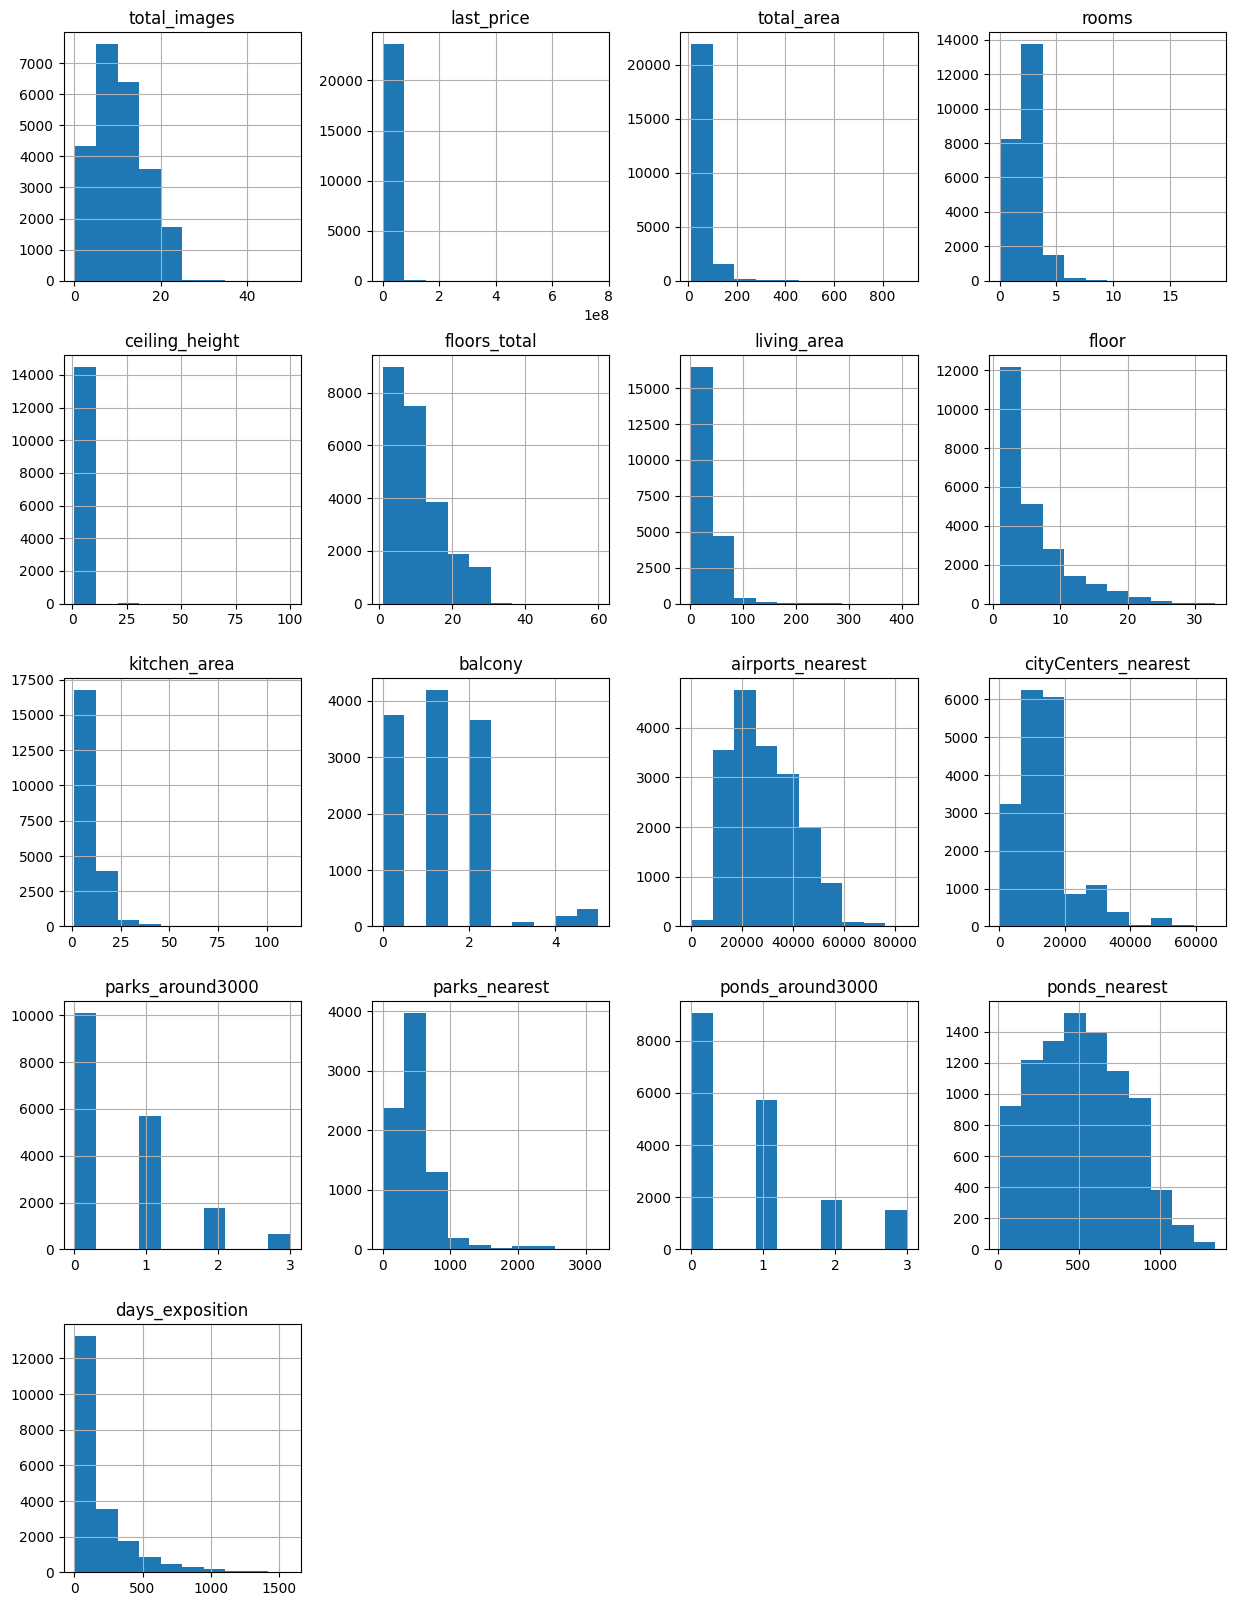

In [4]:
# Let's build diagrams for all numeric columns of the table
data.hist(figsize=(15, 20));

**Conclusion: we read the file and got the first idea of the data.
A large number of omissions in the ceiling_height, balcony, parks_nearest, ponds_nearest columns are striking.
The histograms for the total_area and last_price columns also look suspicious.**

### Data preprocessing

In [5]:
# Let's check how many gaps there are in our table
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# Let's count the share of gaps
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,38.8
floors_total,0.4
living_area,8.0
floor,0.0
is_apartment,88.3


**Let's try to reduce the number of gaps in the table. Life experience and logic suggest that:**
1. The living area directly depends on the total area of the apartment.
2. If the number of balconies is not specified, then we can assume that their number is zero.
3. We will also try to fill in the gaps in the column with the ceiling height.

In [7]:
# Let's test the hypothesis that the living area directly depends on the total area of the apartment
print(data['living_area'].corr(data['total_area']))

0.9395373338721493


In [8]:
# Fill in the gaps in the living_area column with median values for each living_area employment type.
for t in data['total_area'].unique():
    data.loc[(data['total_area'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['total_area'] == t), 'living_area'].median()

In [9]:
# Fill in the gaps in the balcony column with zeros.
data['balcony'] = data['balcony'].fillna(0)

In [10]:
# Let's check how many passes were removed.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area               143
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [11]:
# Fill in the gaps in the ceiling_height column with median values
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

**At this stage, it is difficult to clearly indicate the reason for the omissions in the data. It can be assumed that when customers filled out an ad for the sale of an apartment, they simply did not have all the information about the apartment and therefore left some of the fields empty.**

In [12]:
# Let's output the data types in each column of the table
print(data.dtypes)

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object


In [13]:
# Let's change the data type in the columns balcony and last_price
convert_dict = {'last_price' : int, 'balcony' : int}
data = data.astype(convert_dict)

In [14]:
# Let's check that the data change was correct
data.dtypes

total_images              int64
last_price                int32
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int32
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [15]:
# Remove implicit duplicates from the locality_name column
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок').str.replace('городской поселок', 'поселок').str.replace('поселок при железнодорожной станции', 'поселок станции')
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')

data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'д

#### We are trying to remove abnormal and erratic values from the table

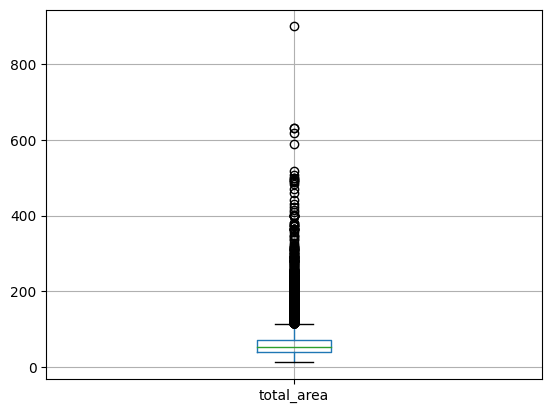

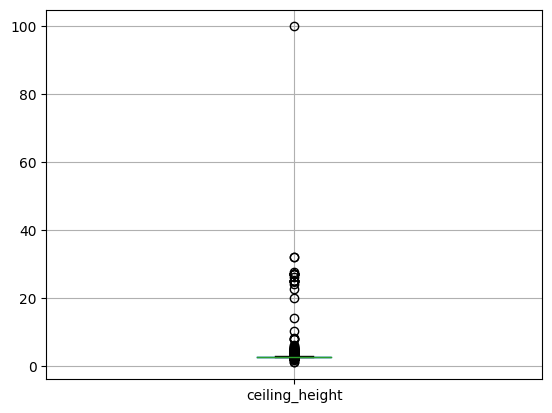

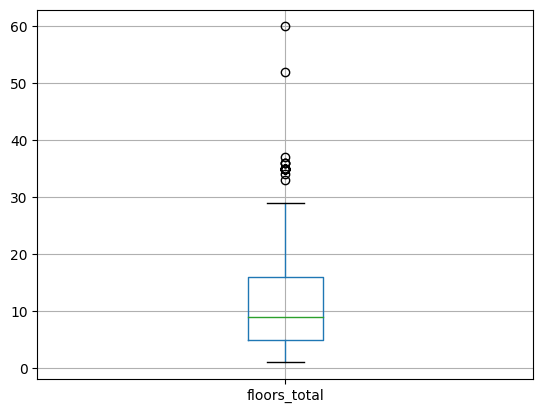

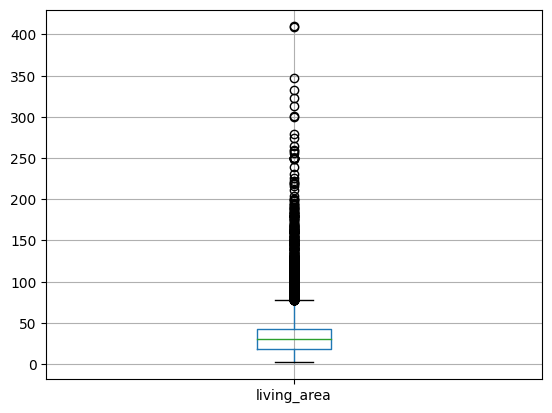

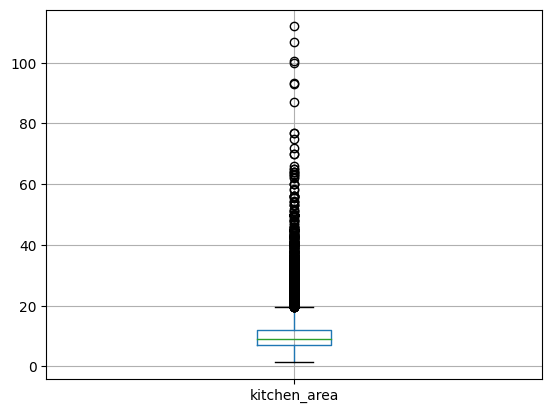

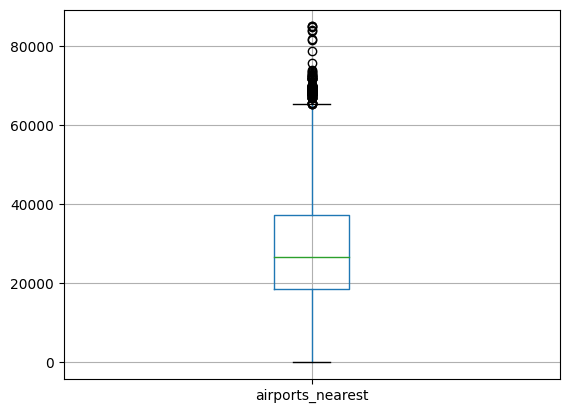

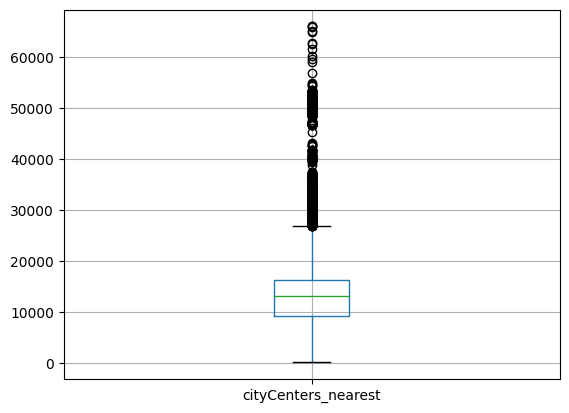

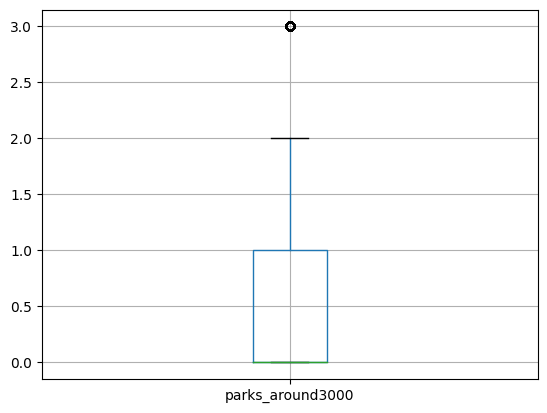

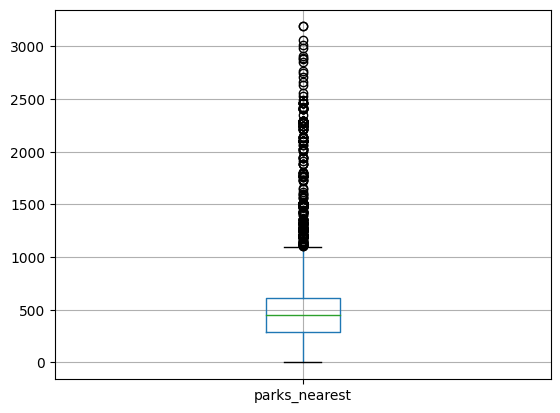

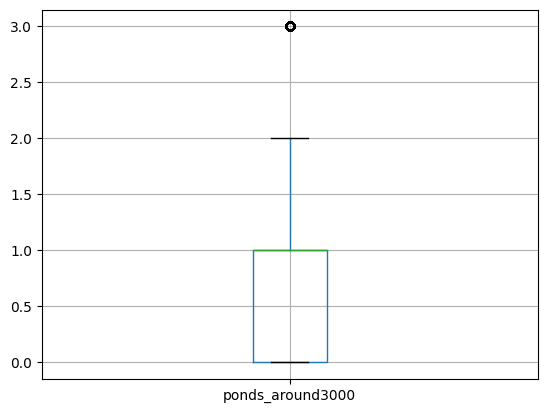

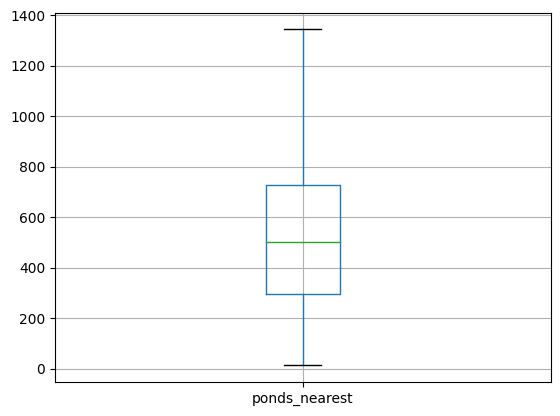

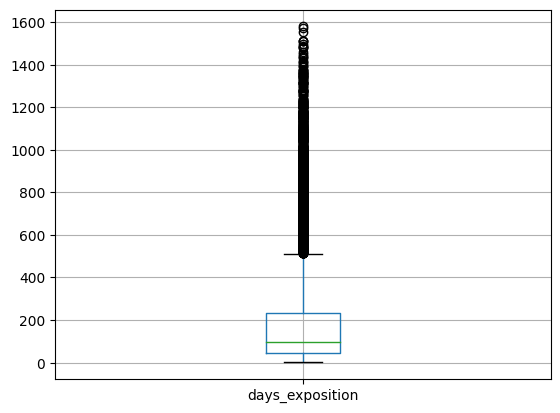

In [16]:
# First, for columns with float, int data types, we will build a data span diagram
for i in data.select_dtypes(include=['float64']).columns:
    plt.figure()
    data.boxplot([i])

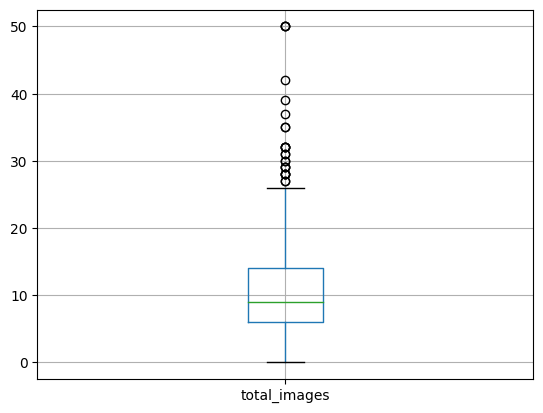

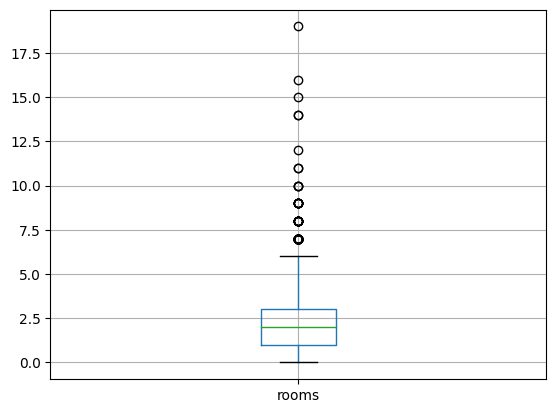

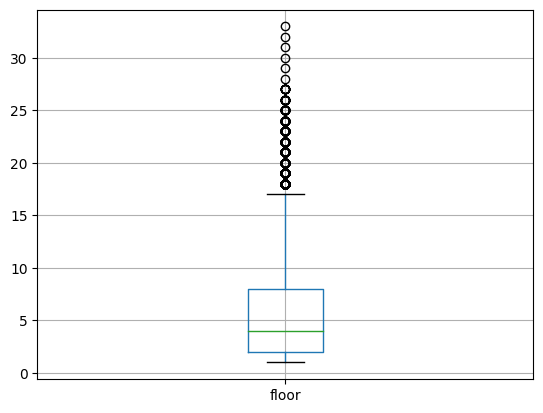

In [17]:
for j in data.select_dtypes(include=['int64']).columns:
    plt.figure()
    data.boxplot([j])

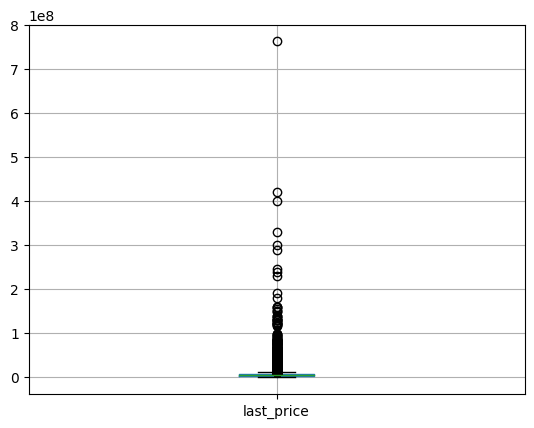

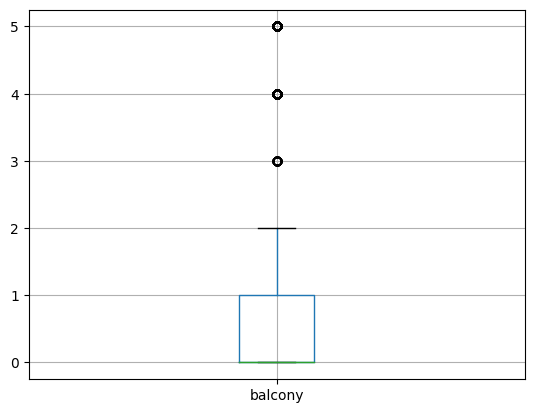

In [18]:
for k in data.select_dtypes(include=['int32']).columns:
    plt.figure()
    data.boxplot([k])

#### We are dealing with the total_area column

In [19]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

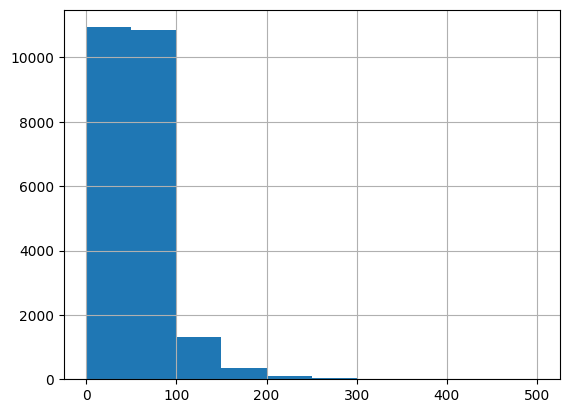

In [20]:
# Let's build a histogram to see which data is the least common, so that we can cut them off later
data['total_area'].hist(range=(0, 500))

**The histogram shows that values greater than 200 are practically not found in the column.**

In [21]:
# Let's calculate for the total_area column the boundaries of the values after which the outliers begin
q75_total_area, q25_total_area = data['total_area'].quantile([0.75, 0.25])
iqr_total_area = q75_total_area - q25_total_area
lower_range_total_area = q25_total_area - 1.5 * iqr_total_area
upper_range_total_area = q75_total_area + 1.5 * iqr_total_area

print(iqr_total_area)
print(lower_range_total_area)
print(upper_range_total_area)

29.900000000000006
-4.8500000000000085
114.75000000000001


In [22]:
# Visually take a look at the table sorted in descending order by the total_area column,
# it may be possible to see some obvious error in the data. 
data.sort_values(by='total_area', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000,900.00,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,False,False,112.00,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
12859,20,140000000,631.20,2019-04-09T00:00:00,7,3.90,4.0,322.3,4,NaN,False,False,19.50,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3117,19,140000000,631.00,2019-03-30T00:00:00,7,2.65,5.0,NaN,5,NaN,False,False,60.00,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
15651,20,300000000,618.00,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,False,False,70.00,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
5358,20,65000000,590.00,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,False,False,100.00,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
4237,1,50000000,517.00,2017-10-14T00:00:00,7,2.65,4.0,332.0,3,NaN,False,False,22.00,0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
8018,20,84000000,507.00,2015-12-17T00:00:00,5,4.45,7.0,301.5,7,True,False,False,45.50,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
5893,3,230000000,500.00,2017-05-31T00:00:00,6,2.65,7.0,NaN,7,NaN,False,False,40.00,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
15016,8,150000000,500.00,2016-01-13T00:00:00,4,3.20,7.0,NaN,7,NaN,False,False,NaN,0,Санкт-Петербург,33058.0,6150.0,3.0,209.0,3.0,531.0,303.0
12401,20,91500000,495.00,2017-06-19T00:00:00,7,4.65,7.0,347.5,7,NaN,False,False,25.00,0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0


**As far as we can see, some of the apartments are not ordinary apartments of the housing stock, but premium real estate with large areas and cost.
To prevent this data from affecting our research, we will delete the data from total_area > 115.**

In [23]:
# Let's check that when we delete the missing values, we will not lose most of the dataframe.
anomalii = len(data[data['total_area'] > 115]) * 100 / len(data)
print(round(anomalii, 2))

5.14


#### We are dealing with the ceiling_height column

In [24]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

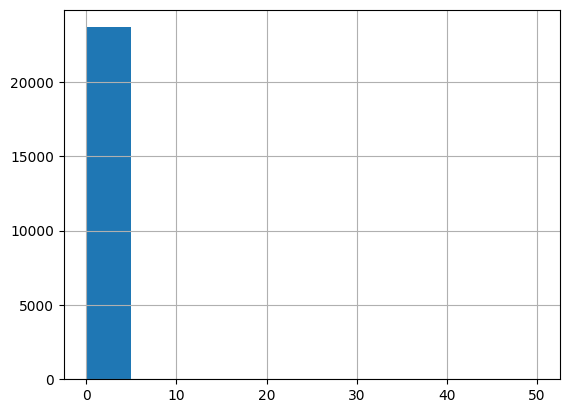

In [25]:
# Let's build a histogram to see which data is the least common, so that we can cut them off later
data['ceiling_height'].hist(range=(0, 50))

In [26]:
# Visually take a look at the table sorted in descending order by the ceiling_height column, 
# it may be possible to see some obvious error in the data.
data.sort_values(by='ceiling_height', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,False,False,11.0,5,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
3148,14,2900000,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,False,False,8.0,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22336,19,9999000,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,False,False,16.5,4,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
21377,19,4900000,42.0,2017-04-18T00:00:00,1,27.5,24.0,37.7,19,False,False,False,11.0,2,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
4876,7,3000000,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,False,True,NaN,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
17857,1,3900000,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,False,False,NaN,0,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
5246,0,2500000,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
20478,11,8000000,45.0,2017-07-18T00:00:00,1,27.0,4.0,22.0,2,NaN,False,False,10.0,1,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
22938,14,4000000,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,False,False,9.0,1,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
5807,17,8150000,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,False,False,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0


In [27]:
# Let's check what unique values are in the ceiling_height column
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [28]:
# Obviously, when filling in this column, mistakes were made due to manual input, we will correct them:
data.loc[data['ceiling_height'] <=1.3, 'ceiling_height'] = data.loc[data['ceiling_height'] <=1.3, 'ceiling_height'] * 10
data.loc[data['ceiling_height'] >=20.0, 'ceiling_height'] = data.loc[data['ceiling_height'] >=20.0, 'ceiling_height'] / 10

In [29]:
# Let's check that the replacements were correct
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
       12.  ,  8.3 ,

<AxesSubplot:>

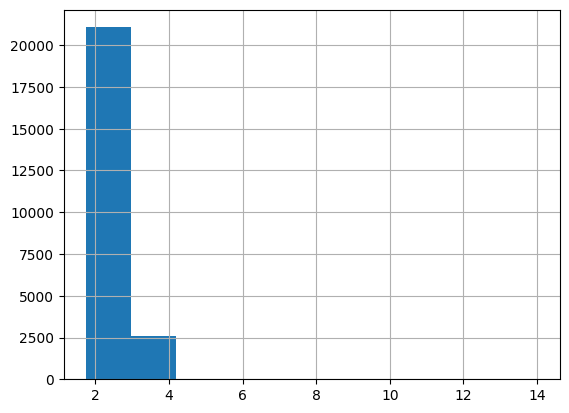

In [30]:
# Let's build the histogram again
data['ceiling_height'].hist()

In [31]:
# Calculate for the ceiling_height column the boundaries of the values after which the outliers begin
q75_ceiling_height, q25_ceiling_height = data['ceiling_height'].quantile([0.75, 0.25])
iqr_ceiling_height = q75_ceiling_height - q25_ceiling_height
lower_range_ceiling_height = q25_ceiling_height - 1.5 * iqr_ceiling_height
upper_range_ceiling_height = q75_ceiling_height + 1.5 * iqr_ceiling_height

print(iqr_ceiling_height)
print(lower_range_ceiling_height)
print(upper_range_ceiling_height)

0.10000000000000009
2.45
2.8500000000000005


**In this column, we first tried to correct the obviously incorrect values. After the errors have been corrected and the boundaries after which the outliers begin are calculated, we can delete the values of ceiling_height > 3.0, since they are anomalous.**

In [32]:
# Let's check that when we delete the missing values, we will not lose most of the dataframe.
anomalii = len(data[data['ceiling_height'] > 3.0]) * 100 / len(data)
print(round(anomalii, 2))

6.38


**It can be seen that we are deleting too much data, so we decide that we will delete data from ceiling_height > 3.5.**

#### We are dealing with the rooms column

<AxesSubplot:>

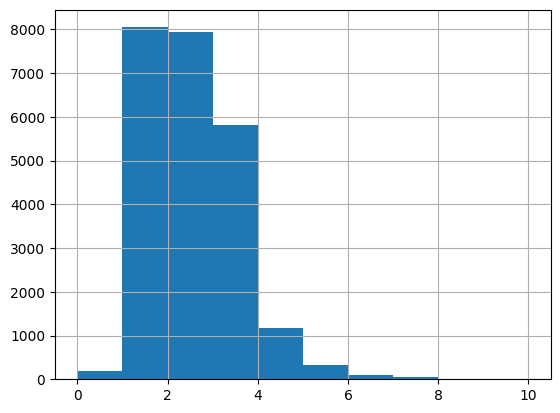

In [33]:
# Let's build a histogram to see which data is the least common, so that we can cut them off later
data['rooms'].hist(range=(0, 10))

**The histogram shows that values greater than 6 are practically not found in the column.**

In [34]:
# Let's calculate for the total_area column the boundaries of the values after which the outliers begin
q75_rooms, q25_rooms = data['rooms'].quantile([0.75, 0.25])
iqr_rooms = q75_rooms - q25_rooms
lower_range_rooms = q25_rooms - 1.5 * iqr_rooms
upper_range_rooms = q75_rooms + 1.5 * iqr_rooms

print(iqr_rooms)
print(lower_range_rooms)
print(upper_range_rooms)

2.0
-2.0
6.0


In [35]:
# Visually take a look at the table sorted in descending order by the rooms column, 
# it may be possible to see some obvious error in the data.
data.sort_values(by='rooms', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000,374.6,2018-06-09T00:00:00,19,2.65,5.0,264.5,2,NaN,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000,270.0,2015-03-02T00:00:00,16,3.00,4.0,180.0,4,NaN,False,False,13.0,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
5358,20,65000000,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
20829,6,28659000,245.4,2016-03-31T00:00:00,14,2.65,4.0,168.3,2,NaN,False,False,25.9,0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0
866,5,25000000,363.0,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,NaN,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
19540,8,420000000,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
9688,8,33000000,194.1,2017-02-07T00:00:00,11,3.43,5.0,129.0,2,NaN,False,False,11.9,0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
648,3,17500000,183.7,2018-07-01T00:00:00,11,3.40,7.0,138.8,7,NaN,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
18119,4,15500000,216.1,2016-07-04T00:00:00,10,3.15,5.0,161.4,2,NaN,False,False,19.8,0,Санкт-Петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,11.0
4149,6,23000000,272.6,2018-01-11T00:00:00,10,3.14,7.0,145.9,7,NaN,False,False,18.8,1,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN


**As far as we can see, some of the apartments are not ordinary apartments of the housing stock, but premium real estate with large areas, cost, number of rooms.
So that these data do not affect our research, we will delete the data from rooms > 7.**

In [36]:
# Let's check that when we delete the missing values, we will not lose most of the dataframe.
anomalii = len(data[data['rooms'] > 7]) * 100 / len(data)
print(round(anomalii, 2))

0.13


#### We are dealing with the last_price column

In [37]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

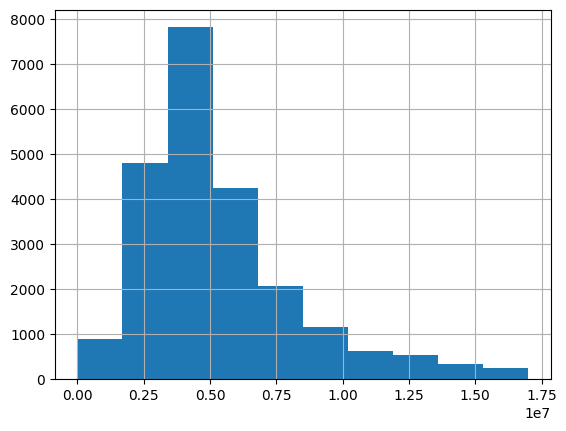

In [38]:
# Let's build a histogram to see which data is the least common, so that we can cut them off later
data['last_price'].hist(range=( 0, 17000000))

**The histograms show that values greater than 17,000,000 almost never occur.**

In [39]:
# Let's calculate for the last_price column the boundaries of the values after which the outliers begin
q75_last_price, q25_last_price = data['last_price'].quantile([0.75, 0.25])
iqr_last_price = q75_last_price - q25_last_price
lower_range_last_price = q25_last_price - 1.5 * iqr_last_price
upper_range_last_price = q75_last_price + 1.5 * iqr_last_price

print(iqr_last_price)
print(lower_range_last_price)
print(upper_range_last_price)

3400000.0
-1700000.0
11900000.0


In [40]:
# Let's check which apartments are more expensive than 12,000,000, it may be possible to see some obvious error in the data 
# that can be corrected.
# It is logical that premium class housing gets here
data[data['last_price'] > 12000000].head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14.0,95.00,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
19,16,14200000,121.0,2019-01-09T00:00:00,3,2.75,16.0,76.00,8,NaN,False,False,12.00,0,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0
35,6,15500000,149.0,2017-06-26T00:00:00,5,2.65,5.0,104.00,4,NaN,False,False,17.00,0,Санкт-Петербург,23670.0,3502.0,0.0,NaN,1.0,779.0,644.0
42,13,22000000,161.8,2015-07-08T00:00:00,4,2.80,4.0,80.90,2,False,False,False,17.60,5,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
51,7,45000000,161.0,2017-10-17T00:00:00,3,3.20,8.0,38.00,4,NaN,False,False,50.00,0,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0
63,2,20000000,118.0,2018-09-11T00:00:00,3,3.00,9.0,68.00,7,NaN,False,False,16.00,0,Санкт-Петербург,26055.0,4800.0,1.0,648.0,1.0,779.0,37.0
121,20,33000000,180.0,2017-02-17T00:00:00,3,2.90,9.0,86.00,8,False,False,False,24.00,4,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0
124,20,12490000,87.8,2019-03-10T00:00:00,3,2.65,12.0,45.10,3,NaN,False,False,24.00,1,Санкт-Петербург,32746.0,13845.0,0.0,NaN,1.0,516.0,NaN
137,11,13310800,85.1,2018-01-01T00:00:00,2,2.70,10.0,31.52,5,NaN,False,False,26.85,1,Санкт-Петербург,31460.0,4263.0,1.0,141.0,3.0,133.0,340.0


**We can see that values greater than 12,000,000 are premium class properties identified earlier.
So that this data does not affect our research and since we do not know how to fix it, we will delete the data from last_price > 12,000,000.**

In [41]:
# Let's check that when we delete the missing values, we will not lose most of the dataframe.
anomalii = len(data[(data['last_price'] > 12000000)]) * 100 / len(data)
print(round(anomalii, 2))

8.19


**It can be seen that we are deleting too much data, so we decide that we will delete data from last_price > 15,000,000.**

In [42]:
# Remove all abnormal values
data_new = data.query('total_area < 115 and last_price < 15000000 and rooms < 7 and ceiling_height < 3.5')

In [43]:
# Let 's estimate how many rows were deleted by
data_new.shape[0] / data.shape[0]

0.92151567576691

**We have deleted about 8% of the dataframe**

In [44]:
# Let's check that the deletion went correctly
data_new[data_new['ceiling_height'] > 3.5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [45]:
data_new[data_new['last_price'] > 15000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Conclusion:
During data preprocessing, we tried to remove implicit duplicates, as well as correct or delete abnormal values.
Also, during data preprocessing, we found that the table contains data not only for ordinary real estate, but also premium real estate with high floor space and price.
Since these data were few compared to the total number, we deleted them so that they would not affect our study.

During data preprocessing, we deleted 8% of the dataframe.

### Let's calculate and add new columns to the table

In [46]:
# Let's add the cost per square meter to the table
data_new['1metre_price'] = data_new['last_price'] / data_new['total_area']

In [47]:
# Let's convert the first_day_exposition column to the date and time format
data_new['first_day_exposition'] = pd.to_datetime(data_new['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [48]:
# Add a column with the day of the week of publication of the ad
data_new['weekday_publication'] = data_new['first_day_exposition'].dt.weekday

In [49]:
# Add a column with the year of publication of the ad
data_new['year_publication'] = pd.DatetimeIndex(data_new['first_day_exposition']).year

In [50]:
# Add a column with the month of publication of the ad
data_new['month_publication'] = pd.DatetimeIndex(data_new['first_day_exposition']).month

In [51]:
# Let's check that the columns have been created
data_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1metre_price,weekday_publication,year_publication,month_publication
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,2019,3
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,2018,12
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,2015,8
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,2018,6
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,NaN,False,False,9.1,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,2018,9


In [52]:
# Let's add the type of apartment floor. First, let's write an auxiliary function.
def function_help(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [53]:
# Add a column with the floor type
data_new['type_floor'] = data_new.apply(function_help, axis=1)

In [54]:
# Let's check that the column has been created
data_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1metre_price,weekday_publication,year_publication,month_publication,type_floor
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,2019,3,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,2018,12,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,2015,8,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,2018,6,другой
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,NaN,False,False,9.1,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,2018,9,другой


In [55]:
# Let's add a column to the table with the distance to the center in kilometers
data_new['distance_to-central'] = round((data_new['cityCenters_nearest'] / 1000), 0)

In [56]:
# Let's check that the column has been created
data_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1metre_price,weekday_publication,year_publication,month_publication,type_floor,distance_to-central
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,2019,3,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,2018,12,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,2015,8,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,2018,6,другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,NaN,False,False,9.1,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,2018,9,другой,NaN


### We will conduct a research analysis of the data

#### Let's study the following parameters of objects:
total area;
living area;
kitchen area;
the price of the object;
number of rooms;
ceiling height;
apartment floor;
apartment floor type ("first", "last", "other");
total number of floors in the house;
distance to the city center in meters;
distance to the nearest airport;
distance to the nearest park;
the day and month of publication of the ad.

For each parameter, we will build a histogram.

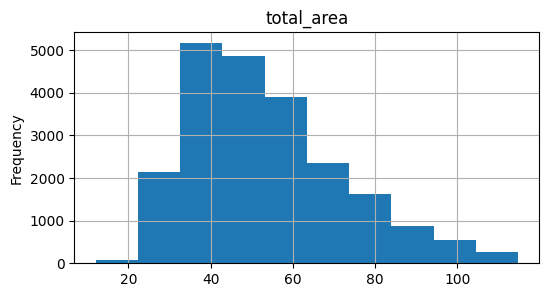

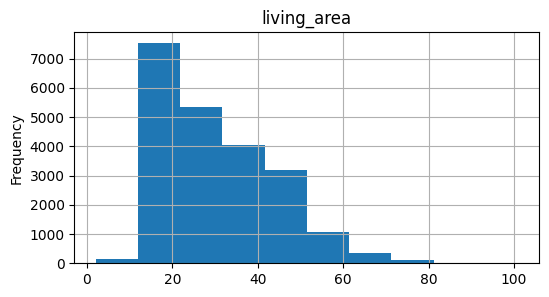

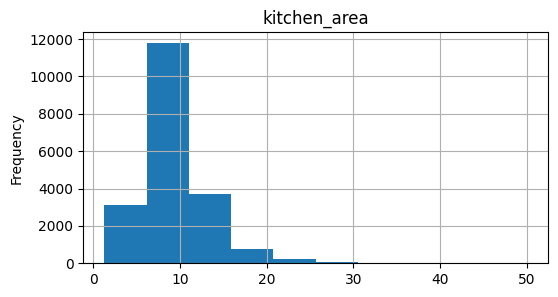

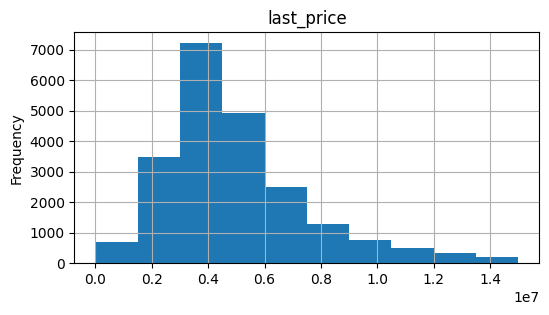

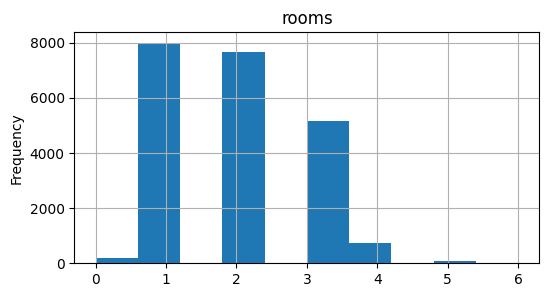

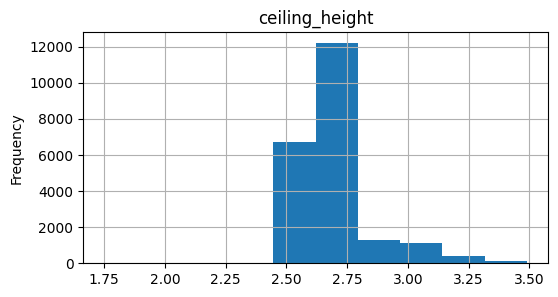

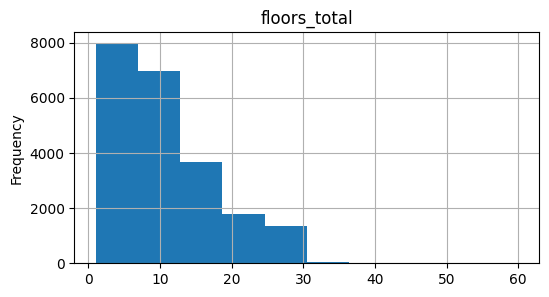

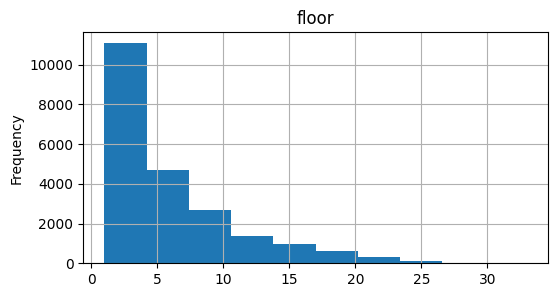

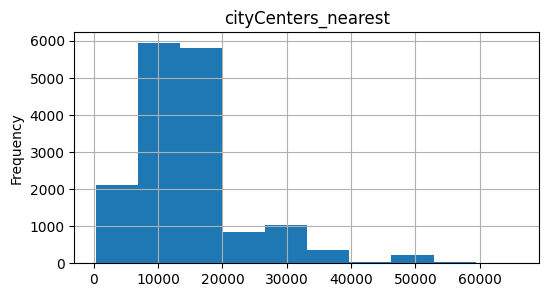

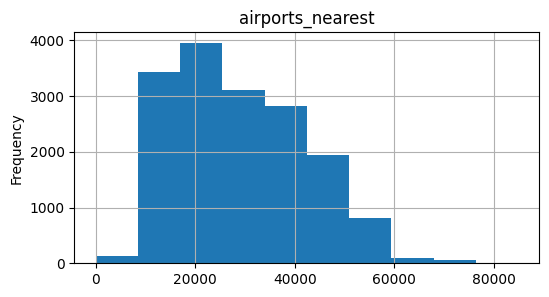

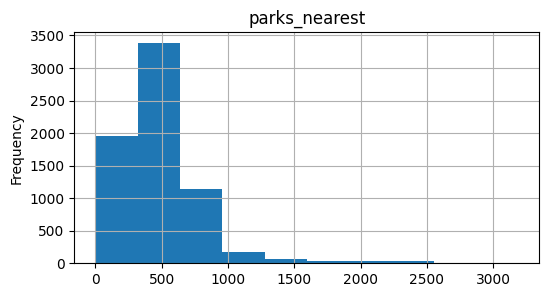

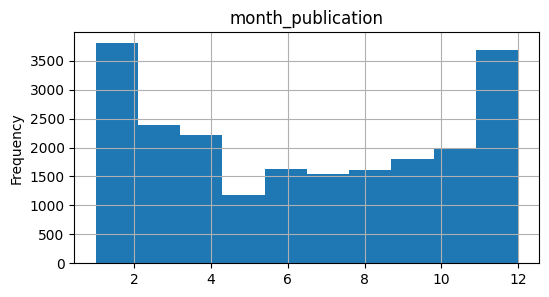

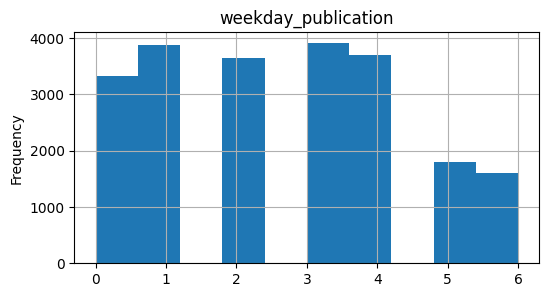

In [57]:
# Let's create a list with the columns we are interested in and build a histogram for each column
list = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floors_total', 'floor', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'month_publication', 'weekday_publication'] 
for col in list:
    data_new[col].plot(kind='hist', title=col, grid=True, figsize=(6, 3))
    plt.show()

<AxesSubplot:>

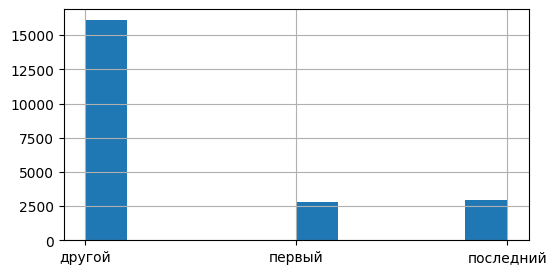

In [58]:
# Построим гистограмму для столбца type_floor
data_new['type_floor'].hist(grid=True, figsize=(6, 3))

#### Conclusion from the histograms:
Our table is dominated by apartments with a total area of approximately 36 to 42 square meters. I believe that these are one-room and small two-room apartments.
There are a large number with a total area of 42 to 56 square meters and 56 to 62 square meters. I believe that these are two-room apartments, depending on the type of house - old housing or a new building.
There are also often apartments with a total area of 22 to 36 (studios and one-room apartments) and from 62 to 82 square meters (three-room apartments).
Apartments with a total area of more than 82 square meters are rare.
Apartments with a total area of up to 22 square meters are practically not found.

Our table is dominated by apartments with a living area of approximately 16 to 21 square meters.
There are a large number with a living area from 21 to 36 square meters and from 36 to 46 square meters.
There are also apartments with a living area of 46 to 61 square meters.
Apartments with a living area of up to 16 square meters and more than 61 square meters are practically not found.

Almost all apartments have a kitchen area ranging from 6 to 11 square meters. I assume that this is due to the type of house (old foundation, new building).
There are kitchens with an area of 11 to 17 square meters. 
There are also kitchens with an area of less than 6 square meters. I assume that this is the size of kitchens designed for studio apartments, where the kitchen and living space are combined..
Kitchens with an area of more than 17 square meters are quite rare.

The most popular prices for apartments range from 3,000,000 to 4,200,000 rubles.
There are also many apartments with a price from 4,200,000 to 6,000,000 rubles.
There are many apartments from 6,000,000 to 7,800,000 rubles.
Less common are apartments from 7,800,000 and 8,500,000 rubles and from 8,500,000 to 12,000,000 rubles.
Apartments more expensive than 12,000,000 rubles are practically not found.
There is also a small group of premises with a price less than 1 800 000 rubles. I believe that these are apartments located in the region and near St. Petersburg (Murino, Kudrovo).

Most of the apartments in the table are one-room or two-room.
There is also a large number of three-bedroom apartments.

The most common ceiling heights range from 2.6 to 2.77 meters.
There are many apartments with a ceiling height of 2.48 to 2.6 meters.
There is also a small group of rooms with a ceiling height from 2.77 to 3.12 meters.
Apartments with a ceiling height of more than 3.12 meters are practically not found.

Most of the apartments are located from the 1st to the 4th floor, or from the 4th to the 6th. This is suspicious, it is possible that when deleting values, we deleted many apartments located on high floors.

Most of the apartments are located within 8,000 to 20,000 meters from the center. I presume that this indicates that most of the apartments are located in St. Petersburg, Murino, Kudrovo.

Ads for the sale of apartments were published monthly, which is logical. The peak of ad publications falls at the beginning and end of the year.

There are quite a few apartments on the first and last floors.

#### Let's study how quickly apartments were sold:
Let's build a histogram.
Let's calculate the average and median.

<AxesSubplot:>

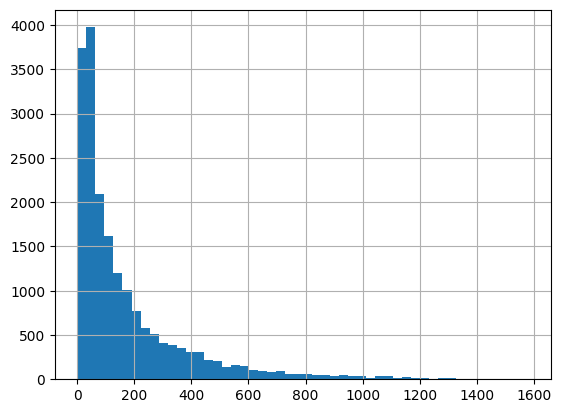

In [59]:
# Let's build a histogram
data_new['days_exposition'].hist(grid=True, bins=50)

In [60]:
# Calculate the average
round(data_new['days_exposition'].mean(), 0)

174.0

In [61]:
# Calculate the median
round(data_new['days_exposition'].median(), 0)

92.0

<AxesSubplot:>

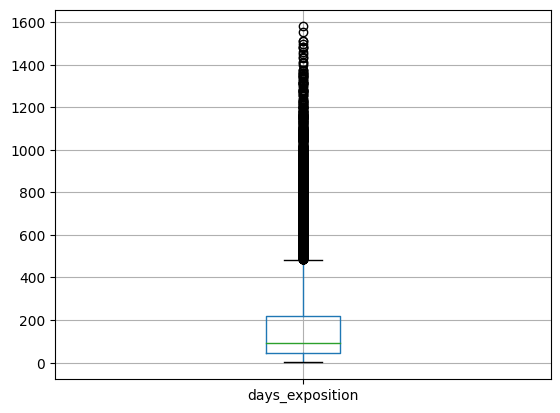

In [62]:
# Additionally, we will construct a data span diagram
data_new.boxplot(column=['days_exposition'], grid= True)

In [63]:
data_new['days_exposition'].describe()

count    19133.000000
mean       173.621439
std        211.860294
min          1.000000
25%         44.000000
50%         92.000000
75%        220.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [64]:
# Let's calculate for the days_exposition column the boundaries of the values after which the outliers begin
q75_days_exposition, q25_days_exposition = data_new['days_exposition'].quantile([0.75, 0.25])
iqr_days_exposition = q75_days_exposition - q25_days_exposition
lower_range_days_exposition = q25_days_exposition - 1.5 * iqr_days_exposition
upper_range_days_exposition = q75_days_exposition + 1.5 * iqr_days_exposition

print(iqr_days_exposition)
print(lower_range_days_exposition)
print(upper_range_days_exposition)

176.0
-220.0
484.0


#### Conclusion:
In my opinion, sales that are beyond the upper limit are unusually long, that is, more than 485 days.
It's just that long sales are, in my opinion, values that are beyond the 3 quartile, i.e. more than 220 days.
In my opinion, fast sales are values below 1 quartile, i.e. less than 44 days.

#### Let's study which factors most affect the total (total) cost of the object.
Let's check if the price depends on:
total area;
residential area;
kitchen areas;
number of rooms;
the floor on which the apartment is located (first, last, other);
dates of placement (day of the week, month, year).

#### Let's check whether the price depends on the total area

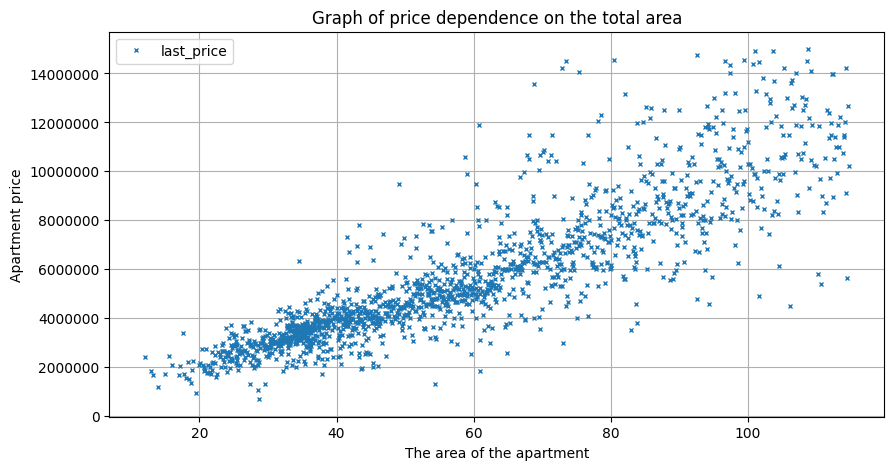

In [65]:
data_new.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(y='last_price', style='x', ms=3, 
                                                                                grid=True, figsize=(10, 5), 
                                                                                title='Graph of price dependence on the total area')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xlabel("The area of the apartment")
plt.ylabel("Apartment price")
plt.show()

In [66]:
# Additionally, we calculate the correlation coefficient
print(data_new['last_price'].corr(data_new['total_area']))

0.7233617845854399


**Conclusion: the graph shows that there is a dependence of the price of the apartment on the living space: with an increase in living space, the price of the apartment increases.
The correlation coefficient also shows that there is a relationship between these parameters.**

#### Let's check whether the price depends on the living space

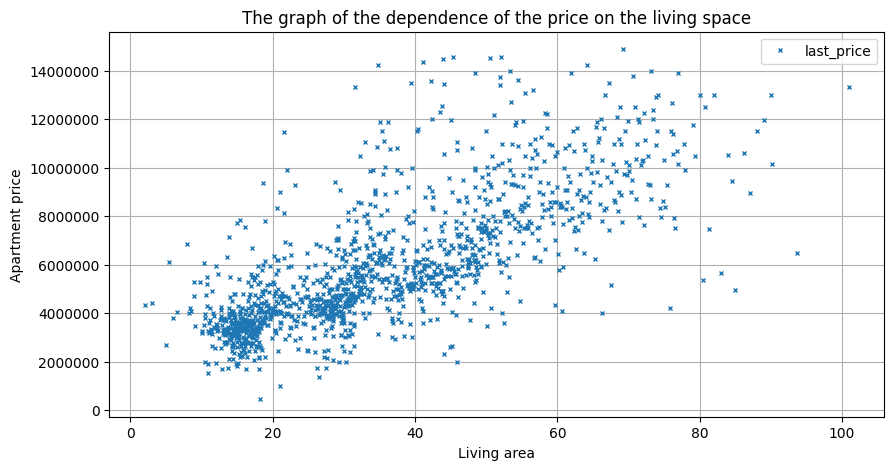

In [67]:
data_new.pivot_table(index='living_area', values='last_price', aggfunc='median').plot(y='last_price', style='x', ms=3, 
                                                                                grid=True, figsize=(10, 5), 
                                                                                title='The graph of the dependence of the price on the living space')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xlabel("Living area")
plt.ylabel("Apartment price")
plt.show()

In [68]:
# Additionally, we calculate the correlation coefficient
print(data_new['last_price'].corr(data_new['living_area']))

0.592121355364806


**Conclusion: according to the schedule, it cannot be said that there is a direct dependence of the price of an apartment on the living space.
Perhaps this is due to the fact that some of the apartments are located in an area where the price is much lower than in St. Petersburg.
The correlation coefficient also shows that there is a connection between these parameters, but not a direct one.**

#### Let's check whether the price depends on the kitchen area

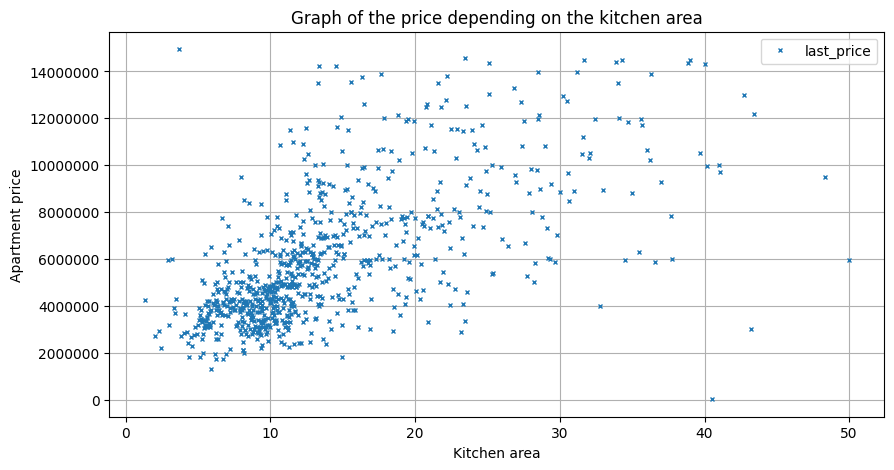

In [100]:
data_new.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').plot(y='last_price', 
                                                                                style='x', ms=3, grid=True, 
                                                                                figsize=(10, 5), 
                                                                                title='Graph of the price depending on the kitchen area')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xlabel("Kitchen area")
plt.ylabel("Apartment price")
plt.show()

In [70]:
# Additionally, we calculate the correlation coefficient
print(data_new['last_price'].corr(data_new['kitchen_area']))

0.5151008737629871


**Conclusion: according to the schedule and the correlation coefficient, it cannot be said that there is a direct dependence of the apartment price on the kitchen area.
Perhaps this is due to the fact that some of the apartments are located in the region, i.e. the apartment may have a large kitchen, but due to its location it may cost significantly less than an apartment in St. Petersburg, even with a small kitchen.**

#### Let's check whether the price depends on the number of rooms

In [71]:
# Let's create a pivot table grouped by the number of rooms and price
data_pivot_rooms = data_new.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'median', 'count'])

In [72]:
data_pivot_rooms

,mean,median,count
,last_price,last_price,last_price
rooms,,,
0,2.900734e+06,2700000,193
1,3.769179e+06,3600000,7980
2,5.148860e+06,4700000,7680
3,6.402479e+06,5850000,5171
4,7.164902e+06,6990000,741
5,7.741343e+06,7650000,67
6,1.125786e+07,12000000,7


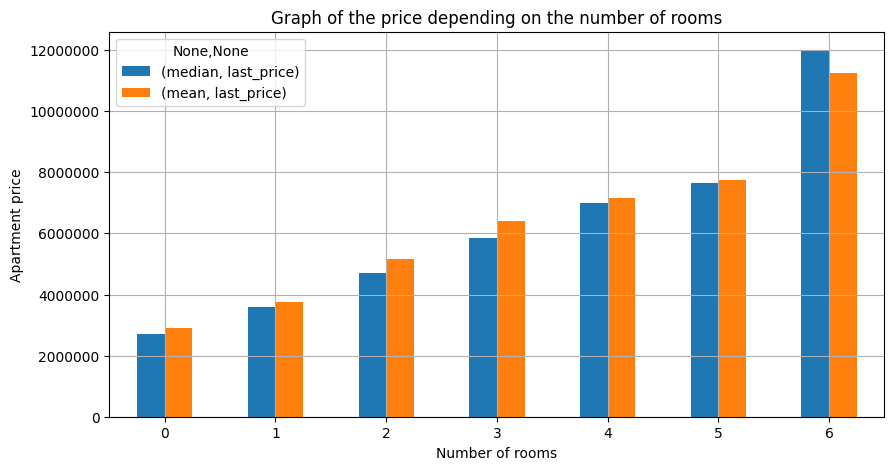

In [101]:
# Let's build a bar chart to visually examine the data obtained
data_new.pivot_table(index='rooms', values='last_price', aggfunc=['median', 'mean']).plot(
    grid=True, figsize=(10, 5), kind='bar', title='Graph of the price depending on the number of rooms')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xlabel("Number of rooms")
plt.ylabel("Apartment price")
plt.xticks(rotation='0')
plt.show()

In [74]:
# Additionally, we calculate the correlation coefficient
print(data_new['last_price'].corr(data_new['rooms']))

0.44238795492393435


**Conclusion: the graph shows that there is a relationship between the number of rooms and the price.
With an increase in the number of rooms in an apartment, the price increases (we can say this for apartments with 1-4 rooms).
Data on apartments with 5 and 6 rooms cannot be considered indicative, since they are extremely poorly represented in the sample.
At the same time, the correlation coefficient shows that there is practically no connection between these parameters.**

#### Let's check whether the price depends on the type of floor

In [75]:
# Let's create a pivot table grouped by price and floor type
data_pivot_type_floor_2 = data_new.pivot_table(index='type_floor', values='last_price', aggfunc=['mean', 'median', 'count'])

In [76]:
data_pivot_type_floor_2

,mean,median,count
,last_price,last_price,last_price
type_floor,,,
другой,5.222987e+06,4600000,16086
первый,4.152233e+06,3800000,2772
последний,4.585059e+06,4006000,2981


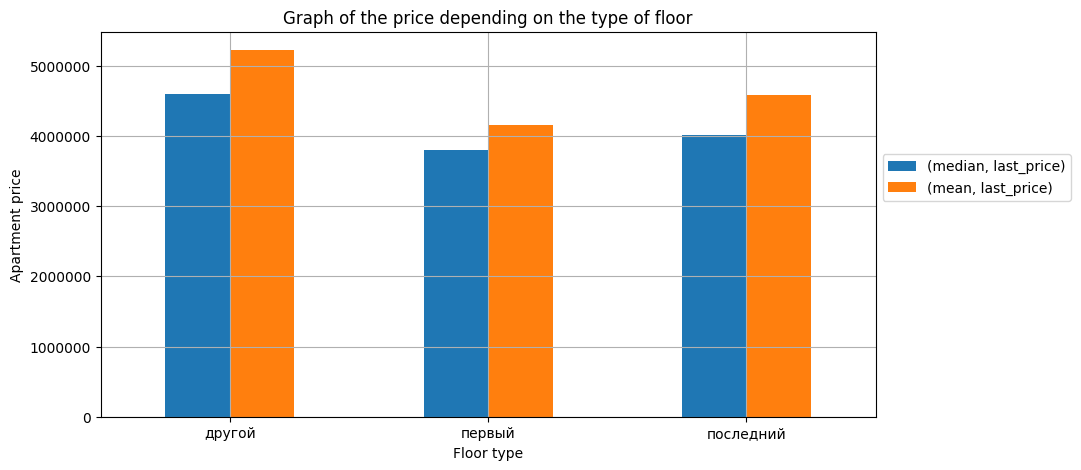

In [102]:
# Let's build a bar chart to visually examine the data obtained
data_new.pivot_table(index='type_floor', values='last_price', aggfunc=['median', 'mean']).plot(
    grid=True, figsize=(10, 5), kind='bar', title='Graph of the price depending on the type of floor')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xlabel("Floor type")
plt.ylabel("Apartment price")
plt.xticks(rotation='0')
plt.legend(bbox_to_anchor=(1, 0.7))
plt.show()

**Conclusion: the graph and summary table show that there is indeed a relationship between the price and the type of floor.
The first and last floors are inferior in price to the "other" type of floor.**

#### Let's check whether the price depends on the day of publication

In [78]:
# Let's create a summary table grouped by price and day of publication
data_pivot_weekday_publication = data_new.pivot_table(index='weekday_publication', 
                                                      values='last_price', aggfunc=['mean', 'median', 'count'])

In [79]:
data_pivot_weekday_publication

,mean,median,count
,last_price,last_price,last_price
weekday_publication,,,
0,4.989910e+06,4450000,3328
1,5.067192e+06,4500000,3870
2,5.014242e+06,4500000,3636
3,5.020650e+06,4400000,3906
4,4.975452e+06,4400000,3705
5,4.889472e+06,4400000,1800
6,4.956728e+06,4445000,1594


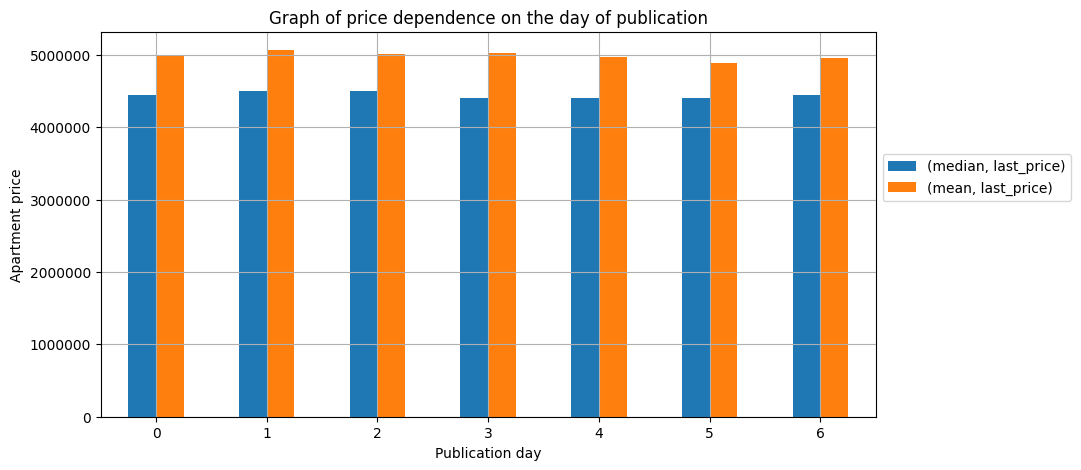

In [103]:
# Let's build a bar chart to visually examine the data obtained
data_new.pivot_table(index='weekday_publication', values='last_price', aggfunc=['median', 'mean']).plot(
    grid=True, figsize=(10, 5), kind='bar', title='Graph of price dependence on the day of publication')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xlabel("Publication day")
plt.ylabel("Apartment price")
plt.xticks(rotation='0')
plt.legend(bbox_to_anchor=(1, 0.7))
plt.show()

**Conclusion: according to the graph and summary table, it is clear that the price does not change much from the day of publication of the ad.**

#### Let's check whether the price depends on the month of publication

In [81]:
# Let's create a pivot table grouped by price and month of publication
data_pivot_month_publication = data_new.pivot_table(index='month_publication', 
                                                    values='last_price', aggfunc=['mean', 'median', 'count'])

In [82]:
data_pivot_month_publication

,mean,median,count
,last_price,last_price,last_price
month_publication,,,
1,4.976269e+06,4490000,1377
2,4.968876e+06,4430000,2425
3,4.978578e+06,4500000,2389
4,5.125500e+06,4600000,2209
5,4.984389e+06,4400000,1176
6,4.815106e+06,4200000,1629
7,4.973114e+06,4399500,1544
8,5.022194e+06,4400000,1616


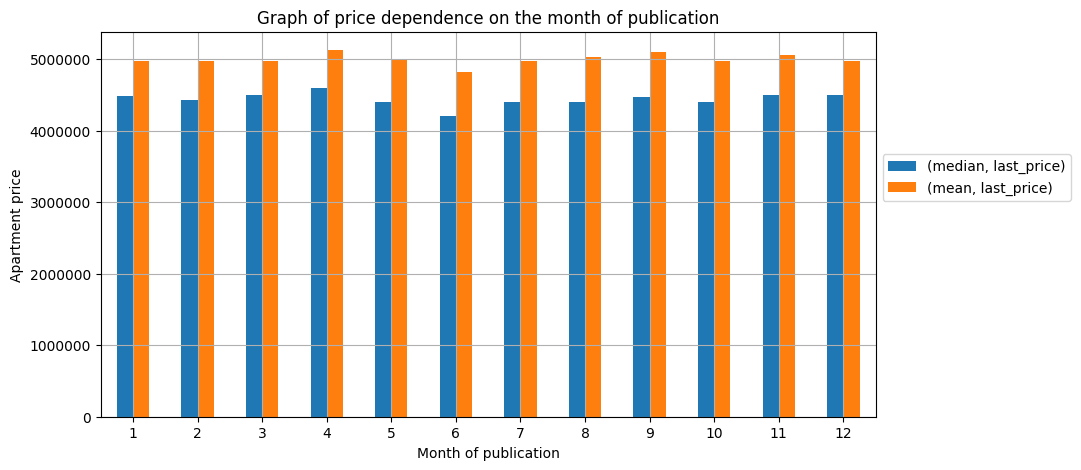

In [104]:
# Let's build a bar chart to visually examine the data obtained
data_new.pivot_table(index='month_publication', values='last_price', aggfunc=['median', 'mean']).plot(
    grid=True, figsize=(10, 5), kind='bar', title='Graph of price dependence on the month of publication')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xlabel("Month of publication")
plt.ylabel("Apartment price")
plt.xticks(rotation='0')
plt.legend(bbox_to_anchor=(1, 0.7))
plt.show()

**Conclusion: according to the graph and the summary table, it can be seen that the price changes depending on the month of publication:
there is an increase in the price in April, and then a decrease in May and June, then from July there is a gradual increase in the price.
Nevertheless, there are no sharp price jumps depending on the month.**

#### Let's check whether the price depends on the year of publication

In [84]:
# Let's create a summary table grouped by price and year of publication
data_pivot_year_publication = data_new.pivot_table(index='year_publication', values='last_price', 
                                                   aggfunc=['mean', 'median', 'count'])

In [85]:
data_pivot_year_publication

,mean,median,count
,last_price,last_price,last_price
year_publication,,,
2014,6.629768e+06,5920000,98
2015,5.431177e+06,4925000,1026
2016,4.931066e+06,4300000,2523
2017,4.907517e+06,4300000,7545
2018,4.924375e+06,4400000,7983
2019,5.327827e+06,4899500,2664


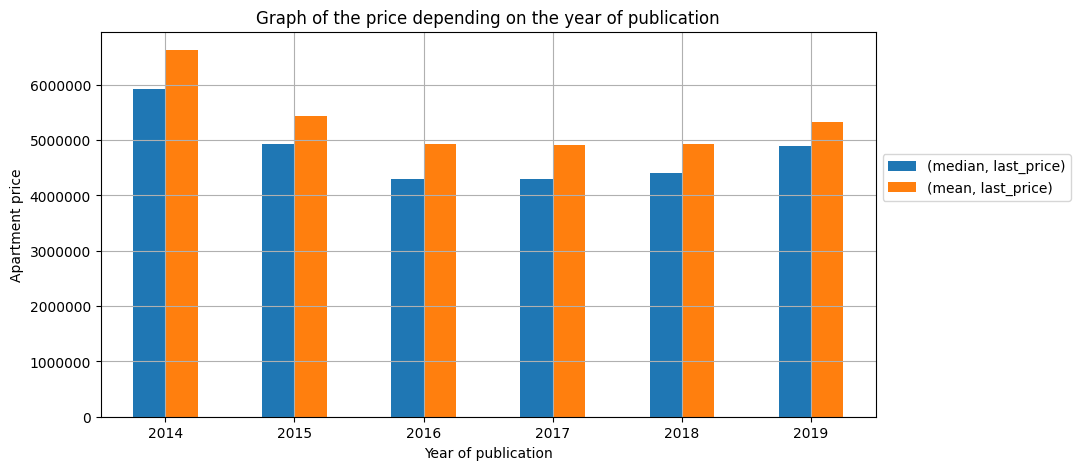

In [105]:
# Let's build a bar chart to visually examine the data obtained
data_new.pivot_table(index='year_publication', values='last_price', aggfunc=['median', 'mean']).plot(
    grid=True, figsize=(10, 5), kind='bar', title='Graph of the price depending on the year of publication')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xlabel("Year of publication")
plt.ylabel("Apartment price")
plt.xticks(rotation='0')
plt.legend(bbox_to_anchor=(1, 0.7))
plt.show()

**Conclusion: the graph and summary table show that the price varies depending on the year of publication:
after 2015, there is a decrease in prices, especially in 2016, 2017, 2018. In 2019, the price increases and is practically compared with 2015.
The peak value in 2014, in my opinion, cannot be taken into account due to the lack of data for this year.**

#### Let's calculate the average price per square meter in 10 localities with the largest number of ads.

In [87]:
# Let's create a pivot table grouped by locality and average price per square meter
data_metre = data_new.pivot_table(index='locality_name', values=['1metre_price', 'floor'], 
                                  aggfunc={'1metre_price': 'mean', 'floor' : 'count'})

In [88]:
# Let's check that the table has been created
data_metre.head()

,1metre_price,floor
locality_name,,
Бокситогорск,17457.330124,15
Волосово,40183.325974,36
Волхов,35087.679877,111
Всеволожск,67099.659730,391
Выборг,57951.307506,220


In [89]:
# Rename the columns of the table to more understandable ones
data_metre.columns = ['1metre_average_price', 'Number of ads']

In [90]:
# We will get data on 10 localities with the largest number of ads.
data_metre.sort_values(by='Number of ads', ascending=False).head(10)

,1metre_average_price,Number of ads
locality_name,,
Санкт-Петербург,107308.652286,14008
Мурино,86087.512050,590
Кудрово,95290.604958,471
поселок Шушары,78682.540681,436
Всеволожск,67099.659730,391
Пушкин,101086.906871,336
Колпино,75370.025473,336
поселок Парголово,90332.263023,326
Гатчина,68974.051834,303


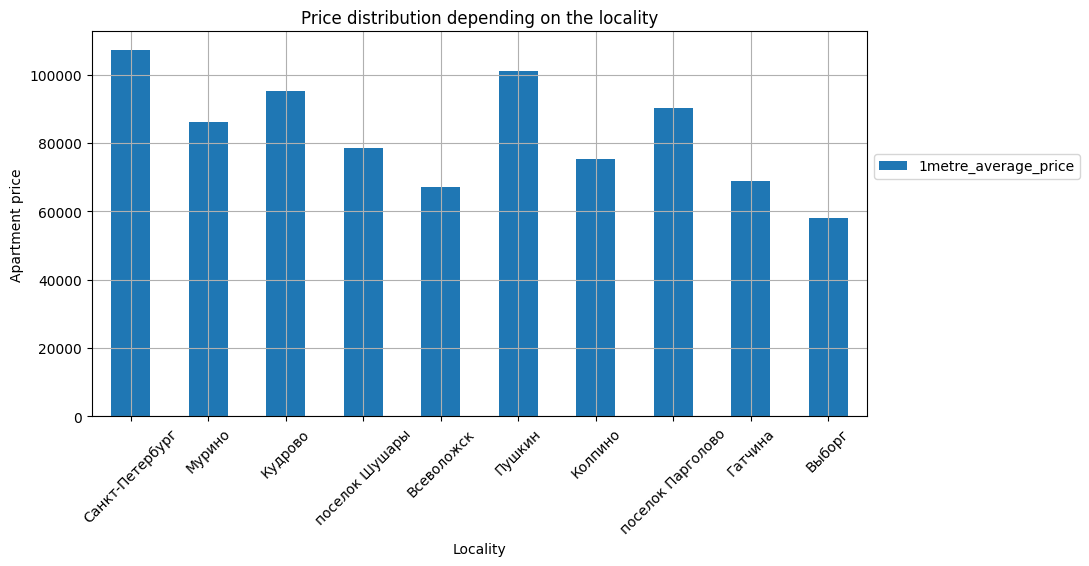

In [106]:
# For clarity, let's build a bar chart
data_metre.sort_values(by='Number of ads', ascending=False).head(10).plot(
    y='1metre_average_price', grid=True, figsize=(10, 5), kind='bar', 
    title='Price distribution depending on the locality')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xlabel("Locality")
plt.ylabel("Apartment price")
plt.xticks(rotation='45')
plt.legend(bbox_to_anchor=(1, 0.7))
plt.show()

**Conclusion:
of the 10 localities with the largest number of ads, the highest average price per square meter is in St. Petersburg, the lowest is in Vyborg.
St. Petersburg is the absolute leader in the number of ads, which is logical.**

#### We will find the settlements with the highest and lowest price per square meter.

In [92]:
# We will find the locality with the highest price per square meter
data_metre[data_metre['1metre_average_price'] == data_metre['1metre_average_price'].max()]

,1metre_average_price,Number of ads
locality_name,,
Санкт-Петербург,107308.652286,14008


In [93]:
# We will find the locality with the lowest price per square meter
data_metre[data_metre['1metre_average_price'] == data_metre['1metre_average_price'].min()]

,1metre_average_price,Number of ads
locality_name,,
деревня Старополье,11206.221198,3


#### Let's allocate apartments in St. Petersburg and calculate the average price of each kilometer

In [94]:
# We leave apartments only in St. Petersburg
data_spb = data_new.query('locality_name == "Санкт-Петербург"')

In [95]:
# Let's create a pivot table grouped by distance to the city center and average cost
data_spb_pivot = data_spb.pivot_table(index='distance_to-central', 
                                      values=['1metre_price', 'floor'], aggfunc={'1metre_price': 'mean', 'floor' : 'count'})

In [96]:
data_spb_pivot

,1metre_price,floor
distance_to-central,,
0.0,106672.589765,7
1.0,124252.943644,100
2.0,123433.407905,164
3.0,112266.913436,232
4.0,121192.128115,454
5.0,125045.519623,609
6.0,126187.322233,441
7.0,119695.367476,304
8.0,118475.489986,501


In [97]:
data_spb_pivot.columns = ['1metre_average_price', 'count']

In [98]:
data_spb_pivot

,1metre_average_price,count
distance_to-central,,
0.0,106672.589765,7
1.0,124252.943644,100
2.0,123433.407905,164
3.0,112266.913436,232
4.0,121192.128115,454
5.0,125045.519623,609
6.0,126187.322233,441
7.0,119695.367476,304
8.0,118475.489986,501


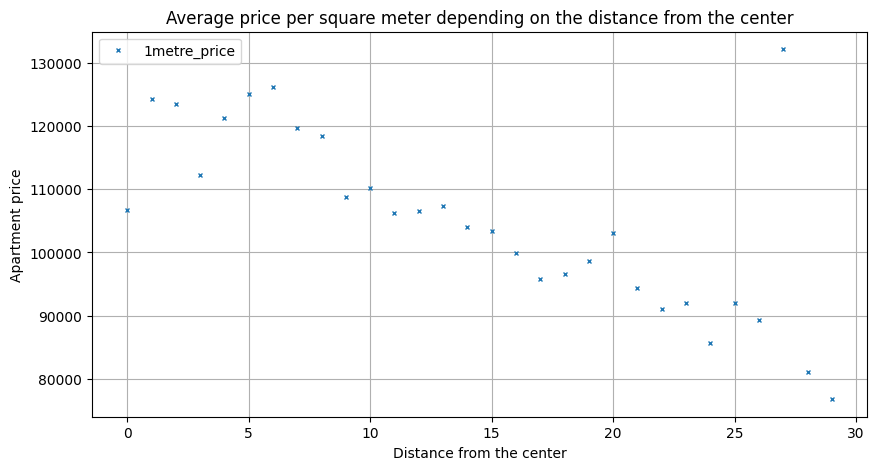

In [107]:
# Visualize the received data
data_spb.pivot_table(index='distance_to-central', values='1metre_price', aggfunc='mean').plot(
    y='1metre_price', style='x', ms=3, grid=True, figsize=(10, 5), 
    title='Average price per square meter depending on the distance from the center')
plt.xlabel("Distance from the center")
plt.ylabel("Apartment price")
plt.xticks(rotation='0')
plt.show()

**Conclusion: despite the presence of some outstanding values, we can say that with distance from the city center, the average price per square meter decreases.**

### General conclusion
In this project, we examined the data of the Yandex service.Real estate — archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years.
Our task was to determine the parameters that affect the cost of the apartment.
The project is divided into several parts:
in the first part, we preprocessed the data, tried to fill in the gaps, find and eliminate abnormal values.
Also in the first part of the project, we found that in addition to the usual apartments, there are also data on premium real estate in the source data. It was decided to exclude this data from the analysis, in total, during data preprocessing, we deleted 8% of all values.

in the second part, we were engaged in research analysis: we studied various columns of the table, built histograms and drew conclusions based on them. We were able to establish the following:
1. Our table is dominated by apartments with a total area of approximately 36 to 42 square meters. I believe that these are one-room and small two-room apartments.
2. Our table is dominated by apartments with a living area of approximately 16 to 21 square meters.
3. Almost all apartments have a kitchen area ranging from 6 to 11 square meters. I assume that this is due to the type of house (old foundation, new building).
4. The most popular prices for apartments range from 3,000,000 to 4,200,000 rubles.
5. Most of the apartments in the table are one-room or two-room.
6. The most common ceiling heights range from 2.6 to 2.77 meters.
7. Most of the apartments are located from 1st to 4th floor.
8. Most of the apartments are located within 8,000 to 20,000 meters from the center. I presume that this indicates that most of the apartments are located in St. Petersburg, Murino, Kudrovo.
9. Ads for the sale of apartments were published monthly, which is logical. The peak of ad publications falls at the beginning and end of the year.
10. There are quite a few apartments on the first and last floors.

in the third part of the project, we studied how quickly apartments were sold. To do this, we built a histogram, calculated the average and median.
We came to the conclusion that unusually long sales are more than 485 days, and fast sales are less than 44 days.

in the fourth part of the project, we studied which factors most affect the total (total) cost of the object.
We managed to establish the following:
1. The price of an apartment directly depends on: the total area, the number of rooms, the type of floor.
2. There is no direct connection between the price of the apartment and : living space, kitchen area, month of publication of the ad.
3. The price of the apartment does not depend on the day of publication of the announcement.
4. The price of the apartment changed depending on the year. Obviously, the situation on the real estate market was different in different years.

in the fifth part of the project, we considered the average price per square meter in 10 localities with the largest number of ads.
We managed to establish the following:
1. The highest average price per square meter in 10 localities with the largest number of ads in St. Petersburg,
2. the lowest average price per square meter in 10 localities with the largest number of ads in Vyborg.
3. St. Petersburg is the absolute leader in the number of ads.
4. The village of Lisiy Nos is a locality with the highest average price per square meter among all settlements.
5. The village of Staropolye is a locality with the lowest average price per square meter among all localities.

in the sixth part of the project for apartments in St. Petersburg, we calculated the average price of each kilometer.
We were able to establish the following: despite the presence of some knockout pockets, we can say that with distance from the city center, the average price per square meter decreases.